# Computational Physics: sample Questions


    1. **Polynomial curve fitting**  

Modify your program for polynomial curve fitting so that it calculates the root-mean-squared error $\epsilon_{rms}$ of the fit, where

$ \epsilon_{rms} = \sqrt{\frac{\sum_{i}{(y_i - f(x_i))^2}}{N}}  $

Here, $y_i$ is the y-value for the i-th data point, $f(x_i)$ is the value of the fit function at $x_i$ and $N$ is the number of data points. 

Have your program generate a plot that graphs the data as points and the fit as a curve. 

Include axes labels, the value of $\epsilon$ and the equation of the fitted line, including the fit parameters to three decimal places.

Your code should produce a figure that looks something like the one in this image. 


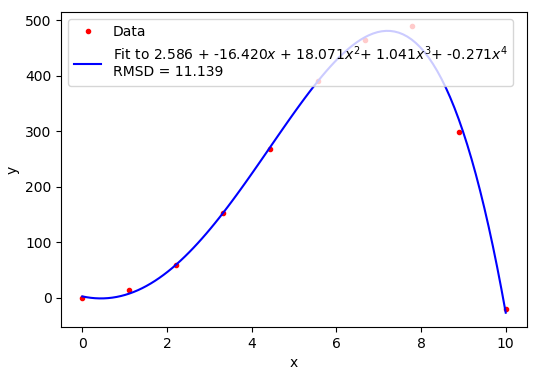

In [1]:
#import necessary libraries
import numpy as np
from numpy import zeros, loadtxt, linspace, empty,copy
from pylab import plot, show, xlabel, ylabel, legend

def solvematrix(M,b):
    A = copy(M)
    v = copy(b)
    N = len(v)
    
    # Gaussian elimination
    for m in range(N):
        
        # Partial pivoting
        maximum = abs(A[m,m])
        pivot = m
        
        # Determine which row has largest element
        for n in range(m+1,N):
            if abs(A[n,m]) > maximum:
                pivot = n
        
        # Swap rows
        for n in range(N):
            A[m,n], A[pivot,n] = A[pivot,n], A[m,n]
        v[m], v[pivot] = v[pivot],v[m]
        
        # Divide by the diagonal element
        div = A[m,m]
        A[m,:] /= div
        v[m] /= div
    
        # Now subtract from the lower rows
        for i in range(m+1,N):
            mult = A[i,m]
            A[i,:] -= mult*A[m,:]
            v[i] -= mult*v[m]
    
    
    # Backsubstitution
    x = empty(N,float)
    for m in range(N-1,-1,-1):
        x[m] = v[m]
        for i in range(m+1,N):
            x[m] -= A[m,i]*x[i]
    return(x)


In [2]:
# Function to feet polynomial and plot it
def RMSE(degree):
    data = loadtxt("data.txt", float)  # import data
    x = data[:,0]                       # x data
    y = data[:,1]                       # y data
    N = len(x)                         # number of data points

# Fit parameters
#degree = 4                             # polynomial degree
    A = zeros([degree+1, degree+1], float)  # empty matrix
    v = zeros(degree+1, float)              # empty vector

# Rows i, columns j
    for i in range(degree+1):
        v[i] = sum(y*x**i)              # vector
        for j in range(degree+1):   
            A[i,j] = sum(x**(i+j))      # matrix
    a = solvematrix(A,v)                # calculate the fit coefficients

# Generate polynomial curve
    M = 100                            # number of data points for curve
    xpol = linspace(x[0], x[-1], M)     # x values
    ypol = zeros(M, float)              # initialize y values
    for n in range(degree + 1):
        ypol += a[n]*xpol**n            # add each term in polynomial

# Make function of fitted polynomial
    def f(x):
        yf = 0
        for n in range(degree + 1):
            yf += a[n]*x**n
        return yf

# calculate the root-mean-squared error of the fit
    error_sum = 0
    for i in range(N):
        error_sum += (y[i] - f(x[i]))**2
        #print(i,x[i],y[i],f(x[i]))
    error = (error_sum/N)**0.5
    #print(error)

# Plot results
    #plot(x,y, "r.", label="Data")

#writing polynomial equation of fitted line
    s = "Fit to {:.3f}".format(a[0])       #add first coefficient to string
    for n in range(1, degree + 1):
        sign='+'
        if a[n]<0: sign='-'
        s += " "+sign+" {:.3f}$x^{}$".format(abs(a[n]),'{'+'{}'.format(n)+'}')
    plot(xpol, ypol,"-", label=s + '\n' + ' Order {} Polynomial with RMSE = {:.3f}'.format(degree,error)) #plot the polynomial equation of the fitted line and RMSD
    #xlabel("x")
    #ylabel("y")
    #legend(loc="upper left")
    #show()
    return error


Use your program to perform fits up to a 10th degree polynomial to the data in data.txt on Canvas.

Fitting with 0  degree polynomial, RMSE is : 186.33564571996226
Fitting with 1  degree polynomial, RMSE is : 164.57217188144227
Fitting with 2  degree polynomial, RMSE is : 107.62283588248232
Fitting with 3  degree polynomial, RMSE is : 20.143613613196617
Fitting with 4  degree polynomial, RMSE is : 11.139206556727734


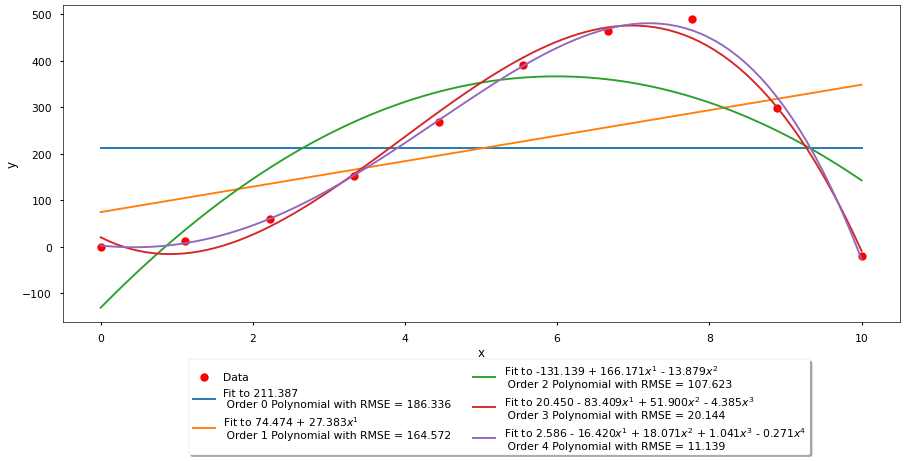

In [3]:
import matplotlib.pyplot as plt

# load and parse data
data = loadtxt("data.txt", float)  # import data.txt
x = data[:,0]                       # x data
y = data[:,1]                       # y data
N = len(x)                         # number of data points

plt.style.use('seaborn-talk')
fig = plt.figure(figsize=(18,7), dpi=60, facecolor='w', edgecolor='k')
plot(x,y, "ro", label="Data",markersize=10)
for k in np.arange(0,5):
#k=3
    print("Fitting with",k," degree polynomial, RMSE is :",RMSE(k))
    #print('#############')
kk=25    
xlabel("x") #+'$x^{}$'.format('{25}'))
ylabel("y") #+'$x^{}$'.format('{'+'{}'.format(kk)+'}'))
#legend(loc="upper left")
#legend(loc='upper left', bbox_to_anchor=(0.0, -0.1), ncol=2,fancybox=True, shadow=True)
legend(ncol=2,bbox_to_anchor=(0.90, -0.1),
           fancybox=True, shadow=True)

show()

Fitting with 6  degree polynomial, RMSE is : 8.117309690857217
Fitting with 7  degree polynomial, RMSE is : 5.177555020888397
Fitting with 8  degree polynomial, RMSE is : 3.1126330465608376
Fitting with 9  degree polynomial, RMSE is : 0.00466772681207928
Fitting with 10  degree polynomial, RMSE is : 0.0005108831123545228


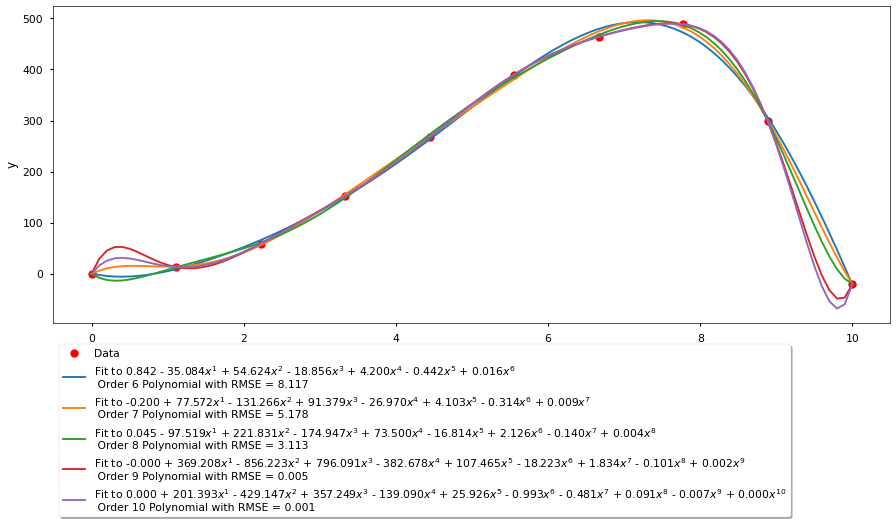

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18,7), dpi=60, facecolor='w', edgecolor='k')
plot(x,y, "ro", label="Data",markersize=10)
for k in np.arange(6,11):
#k=3
    print("Fitting with",k," degree polynomial, RMSE is :",RMSE(k))
    #print('#############')
xlabel("x")
ylabel("y")
#legend(loc="upper left")
legend(loc='upper left', bbox_to_anchor=(0,-0.05), ncol=1,
           fancybox=True, shadow=True)
show()

What happens to $\epsilon_{rms}$ for the higher-order fits? Try degree 20.

> Answer: for higher orders the number of parameters in the fit exceeds the number of data points !!! we get perfect fits for complicated functions that are nut applicable to the reality as can be seen below 



Fitting with 12  degree polynomial, RMSE is : 1.436010101248199e-05
Fitting with 17  degree polynomial, RMSE is : 2.7584376244883372e-05
Fitting with 20  degree polynomial, RMSE is : 8.321518157705475e-08


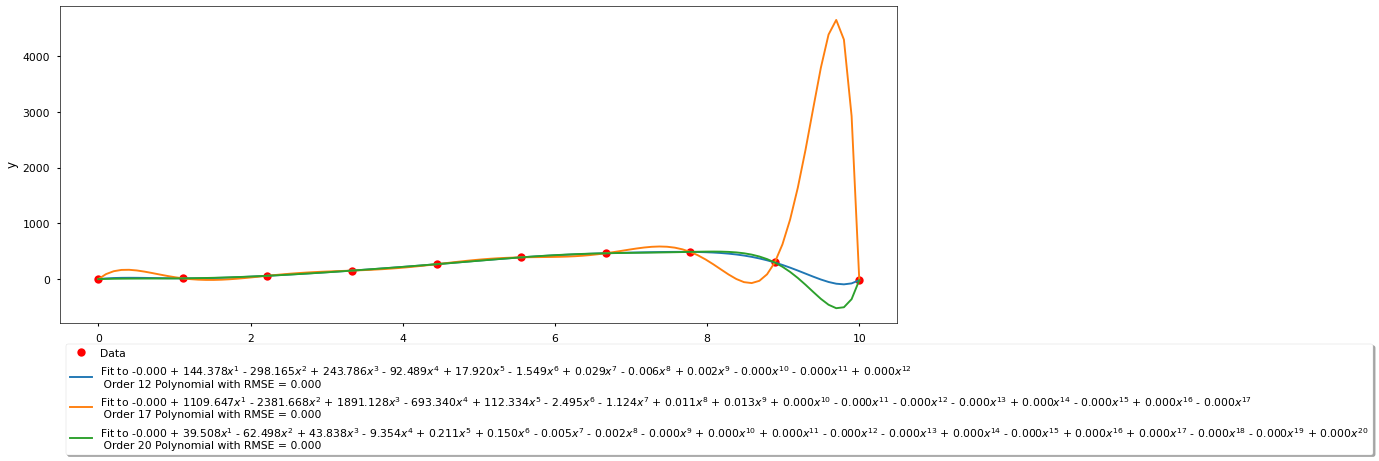

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18,7), dpi=60, facecolor='w', edgecolor='k')
plot(x,y, "ro", label="Data",markersize=10)
for k in [12,17,20]:
#k=3
    print("Fitting with",k," degree polynomial, RMSE is :",RMSE(k))
    #print('#############')
xlabel("x")
ylabel("y")
#legend(loc="upper left")
legend(loc='upper left', bbox_to_anchor=(0,-0.05), ncol=1,
           fancybox=True, shadow=True)
show()

In [6]:
#print(plt.style.available)

What polynomial order seems the most reasonable?
 > I think 4th order polinomyal is the most reasonable given the number of data points and smoothness of the function as well as the fact that it reduces the RMSE error by a factor of 5 from 3rd order polynomial fitting and after that we don't improve it drastically(apart from when we get perfect fits at 9th degree ) Below is the reproduced image of the most rational good fit. 

Fitting with 4  degree polynomial, RMSE is : 11.139206556727734


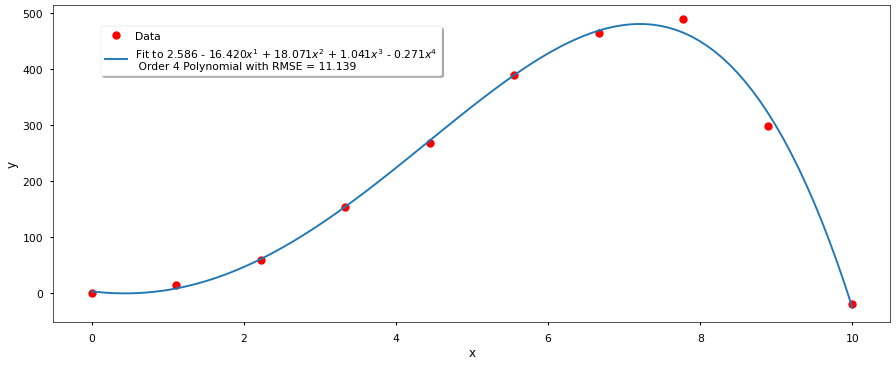

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18,7), dpi=60, facecolor='w', edgecolor='k')
plot(x,y, "ro", label="Data",markersize=10)
for k in [4]:
#k=3
    print("Fitting with",k," degree polynomial, RMSE is :",RMSE(k))
    #print('#############')
xlabel("x")
ylabel("y")
#legend(loc="upper left")
legend(loc='upper left', bbox_to_anchor=(0.05,0.95), ncol=1,
           fancybox=True, shadow=True)
show()